In [63]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression, HuberRegressor

In [6]:
# Body fat dataset from http://www2.stetson.edu/∼jrasp/data.htm;
data = pd.read_csv("BodyFat.csv")

In [9]:
data.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,Unnamed: 17
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,NaN
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,NaN
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,NaN
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,NaN
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,NaN


In [21]:
# We'll only regress weight against height
data_select  = data[["WEIGHT","HEIGHT"]]

# Add a linear dummy field for the model to work
data_select['dummy'] = pd.DataFrame(np.ones(data_select.shape[0]))
data_select.head()

/Users/stargazer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,WEIGHT,HEIGHT,dummy
0,154.25,67.75,1.0
1,173.25,72.25,1.0
2,154.00,66.25,1.0
3,184.75,72.25,1.0
4,184.25,71.25,1.0


In [55]:
# For the LR model
X = np.array(data_select[['HEIGHT','dummy']])
y = np.array(data_select['WEIGHT'])

# For plotting
x_heights = np.array(data_select[['HEIGHT']])
y_weights = np.array(data_select['WEIGHT'])

In [64]:
# Perform line regression
reg = LinearRegression().fit(X, y)
hreg = HuberRegressor().fit(X, y)

In [65]:
# Apply prediction with standard lineare-regression
df_predicted = pd.DataFrame(reg.predict(X))
df_predicted.columns = ['predicted_y']

# Apply prediction with the huber-loss regression
df_predicted_hreg = pd.DataFrame(hreg.predict(X))
df_predicted_hreg.columns = ['predicted_y']

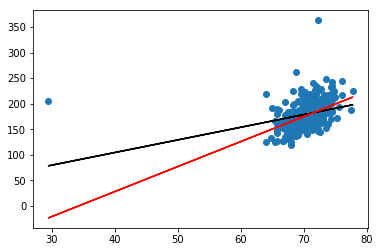

In [66]:
plt.scatter(x_heights, y_weights)
plt.plot(x_heights,np.array(df_predicted['predicted_y']),color='black')
plt.plot(x_heights,np.array(df_predicted_hreg['predicted_y']),color='red')